In [44]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import random as random
from copy import deepcopy
from sklearn.cluster import KMeans

In [3]:
val = pd.read_csv("k-means.csv", delimiter = '\t', decimal = ',', header = None)
val.head()

,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


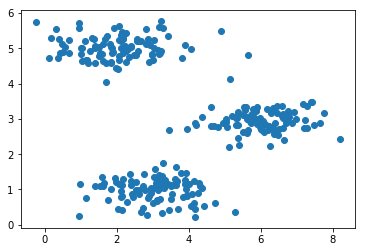

In [4]:
plt.scatter(val[val.columns[0]], val[val.columns[1]])
cl1 = val[val.columns[0]]
cl2 = val[val.columns[1]]

In [5]:
arr = np.array([val[val.columns[0]], val[val.columns[1]]])
k=3
arr_T = arr.T
size = 300
repeat = 100

In [16]:
mid = []

for j in range(3):
    num = random.randint(0, 299)
    mid.append(arr_T[num])
     
val1 = [mid[0][0],mid[1][0], mid[2][0]]
val2 = [mid[0][1],mid[1][1], mid[2][1]]

b = np.array(list(zip(val1, val2)))

In [60]:
def ff(d, e, ax = 1):
    return np.linalg.norm(d - e, axis = ax)

dd = []

prev = np.zeros(b.shape)
ctlr = np.zeros(len(arr_T))

ferq = ff(b, prev, None)
for j in range(repeat):
    for l in range(len(arr_T)):
        mess = ff(arr_T[l], b)
        kl = np.argmin(mess)
        ctlr[l] = kl
        
    prev = deepcopy(b)
    for m in range(k):
        dots = [arr_T[ac] for ac in range(len(arr_T)) if ctlr[ac] == m]
        dd.append(b[m])
        b[m] = np.mean(dots, axis=0)
        
    ferq = ff(b, prev, None)

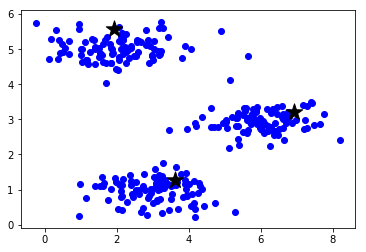

In [61]:
plt.scatter(cl1, cl2, c = 'blue')
plt.scatter(val1, val2, marker = '*', s = 300, c = 'black')

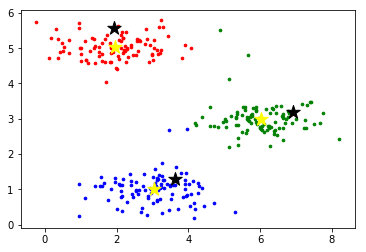

In [62]:
reng = ['r', 'b', 'g']
fig, ax = plt.subplots()
for iter in range(k):
        dots = np.array([arr_T[iterr] for iterr in range(len(arr_T)) if ctlr[iterr] == iter])
        # print(dots)
        ax.scatter(dots[:, 0], dots[:, 1], s=7, c=reng[iter])
plt.scatter(val1, val2, marker = '*', s = 200, c = 'black')

for iter in range(len(prev)):
    plt.scatter(prev[iter][0], prev[iter][1], marker = '*', s = 200, c = 'yellow')

In [63]:
validate = [ [0.3, 5.2],
           [2, 4.4],
           [1.1, 5.2],
           [5.2, 2.9],
           [5.3, 3.3],
           [6.1, 2.8],
           [2, 1]]

In [64]:
for iter in range(len(validate)):
        dt = ff(validate[iter], b)
        l = np.argmin(dt)
        np.zeros(len(x_test))[i] = l

In [65]:
print(clust_s_test)   

[0. 0. 0. 2. 2. 2. 1.]


In [66]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(arr_T)
kmeans.predict([[0.3, 5.2],
                [2, 4.4],
                [1.1, 5.2],
                [5.2, 2.9],
                [5.3, 3.3],
                [6.1, 2.8],
                [2, 1]])

array([2, 2, 2, 1, 1, 1, 0])